# Exercise 42: Classification Using a CART Decision Tree

In this activity we will be using the well known Iris Species dataset [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set) created in 1936 by botanist Ronald Fisher.  The dataset contains Sepal and Petal Length and Width measurements of three different Iris flower species *Iris setosa*, *Iris versicolor*, *Iris virginica*.  Throughout this activity we will use the measurements provided in the dataset to classify the different flower species using a CART decision tree.

## Import the Required Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

## Load the Data
Load the Iris dataset using Pandas and examine the first 5 rows

In [2]:
df = pd.read_csv('iris-data.csv')
df.head()

Sepal Length  Sepal Width  Petal Length  Petal Width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

## Train the model
Train the decision tree model using all available data.  **Remember that in practice decision trees tend to overfit the training set and thus cross validation should be used (see Lesson Six)**

As we have yet to cover cross validation we will extract a random sample of 10 rows to with-hold from training and will provide the data as "unseen" samples to get an idea of the performance of the Decision Tree.

In [3]:
np.random.seed(10)
samples = np.random.randint(0, len(df), 10)
df_test = df.iloc[samples]
df = df.drop(samples)

Fit the model

In [4]:
model = DecisionTreeClassifier()
model = model.fit(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df.Species)
model.score(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df.Species)

1.0

The model achieved 100% accuracy when compared against the training set.  Why is this?  Will this always occur for decision trees?

Compare against the test set:

In [5]:
model.score(df_test[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df_test.Species)

1.0

## Visualising the Model

Depending on your system setup you may need to first install the graphviz package before you can visualise the decision tree.  With Anaconda you can enable and run the next cell to install graphviz

In [6]:
!conda install python-graphviz

/bin/sh: 1: conda: not found


In [7]:
import graphviz
from sklearn.tree import export_graphviz

In [13]:
df.columns[3]

'Petal Width'

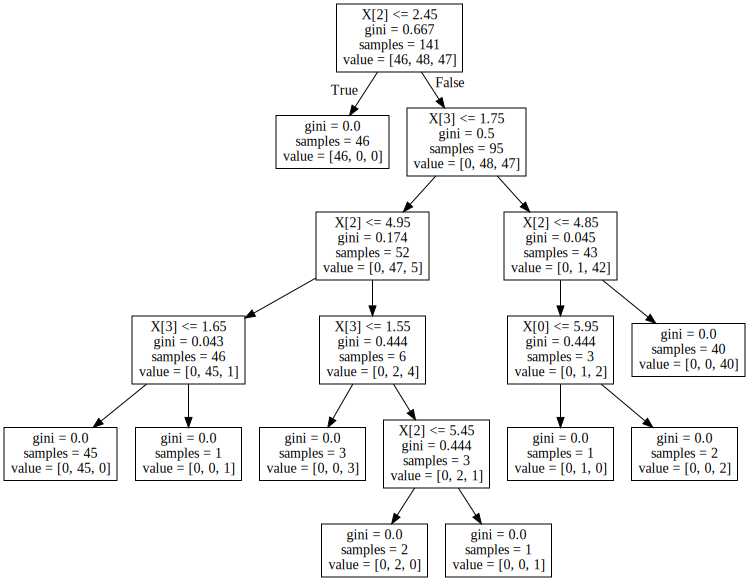

In [9]:
dot_data = export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph